<img src="img/Logo_itq.png" width="200"/>

# Regresión Lineal
<img src="img/python_logo.png"/> <br>
**Nombre:** Kevin Jaramillo<br>
*Fecha:* 19/07/2025<br>
<a href = "https://github.com/Kevin06102023/matching_learning/blob/master/calsificadorSpam.ipynb">Enlace</a>

# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 0. Imports

In [1]:
# Instalacion de librerías externas
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

### 1. Generación del conjunto de datos

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

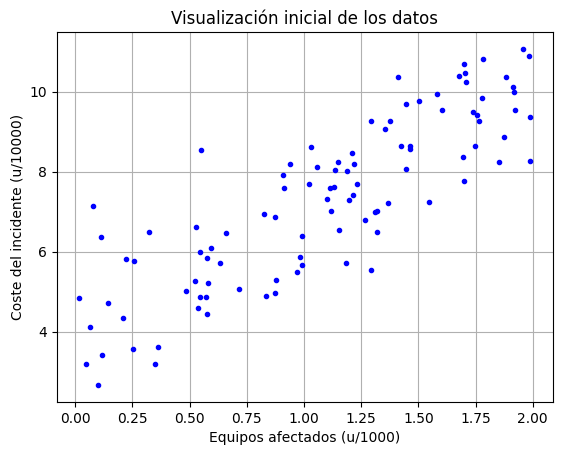

In [11]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.title("Visualización inicial de los datos")
plt.grid(True)
plt.show()

### 3. Modificación del conjunto de datos

In [12]:
# Convertimos a DataFrame
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)

# Escalamos los valores
df['n_equipos_afectados'] = (df['n_equipos_afectados'] * 1000).astype(int)
df['coste'] = (df['coste'] * 10000).astype(int)

# Mostramos los primeros registros
df.head()

,n_equipos_afectados,coste
0,991,56631
1,1850,82288
2,112,63564
3,62,41172
4,1115,75997


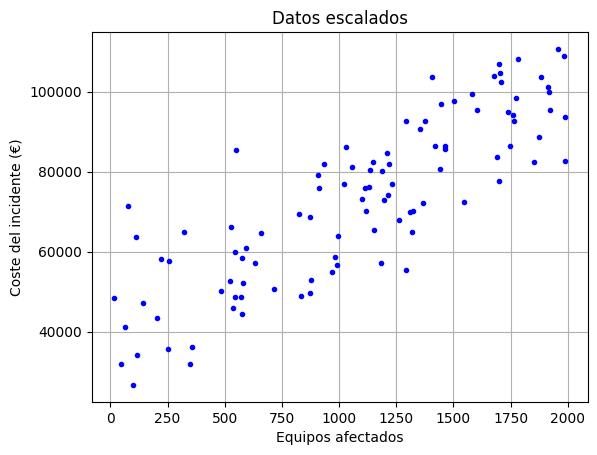

In [13]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente (€)")
plt.title("Datos escalados")
plt.grid(True)
plt.show()

### 4. Construcción del modelo

In [14]:
# Creamos y entrenamos el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(df[['n_equipos_afectados']], df['coste'])

# Mostramos parámetros del modelo
print("Intercepto (θ₀):", lin_reg.intercept_)
print("Coeficiente (θ₁):", lin_reg.coef_[0])

Intercepto (θ₀): 39355.30068367788
Coeficiente (θ₁): 30.99603484752459


C:\Users\LENOVO I3\anaconda\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


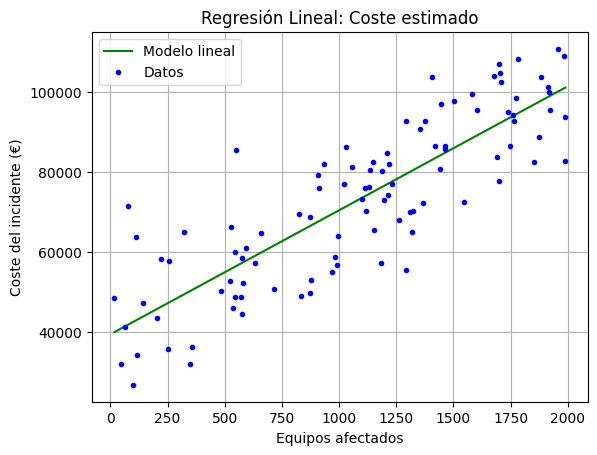

In [7]:
# Rango para dibujar la línea
X_min_max = np.array([[df['n_equipos_afectados'].min()], 
                      [df['n_equipos_afectados'].max()]])
y_pred_line = lin_reg.predict(X_min_max)

plt.plot(df['n_equipos_afectados'], df['coste'], "b.", label="Datos reales")
plt.plot(X_min_max, y_pred_line, "g-", label="Línea de regresión")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente (€)")
plt.title("Modelo de Regresión Lineal")
plt.legend()
plt.grid(True)
plt.show()


### 5. Predicción de nuevos ejemplos

In [10]:
import pandas as pd
x_nuevo = pd.DataFrame({'n_equipos_afectados': [1300]})
coste_estimado = lin_reg.predict(x_nuevo)

print(f"El coste estimado del incidente con {x_nuevo.iloc[0,0]} equipos es: {int(coste_estimado[0])} €")


El coste estimado del incidente con 1300 equipos es: 79650 €


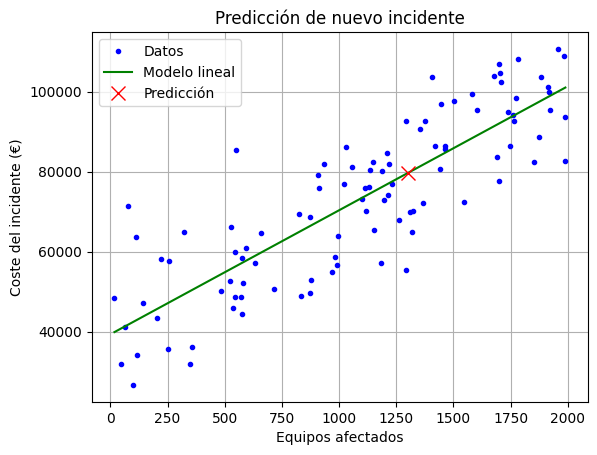

In [9]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.", label="Datos")
plt.plot(X_min_max, y_pred_line, "g-", label="Modelo lineal")
plt.plot(x_nuevo, coste_estimado, "rx", markersize=10, label="Predicción")
plt.title("Predicción de nuevo incidente")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente (€)")
plt.legend()
plt.grid(True)
plt.show()